In [1]:
# -*- coding: utf-8 -*-
from __future__ import unicode_literals

In [2]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import string
from pymorphy2 import MorphAnalyzer
import stop_words

import numpy as np
%matplotlib inline

In [3]:
data = pd.read_csv("laba1.csv", header=[0, 1], index_col=0, encoding='utf-8')
data

политика  \
                                                Title   
0      Путин отверг возможность возврата к социализму   
1   Путин пообещал поддерживать оппозиционных губе...   
2   Главное — не "квасной". Путин назвал патриотиз...   
3   Путин анонсировал переговоры с Пашиняном на сл...   
4   Путин ответил на вопрос, хочет ли он править м...   
5             Обновление пользовательского соглашения   
6   Не как обычно. Политтехнолог перечислил главны...   
7   От НДС и Сирии до Бутиной и рэпа. Эксперты оце...   
8   Прорыв неизбежен. Политолог расшифровал сигнал...   
9   "Президент — прагматик". Песков заявил, что Пу...   
10  Песков заявил, что хаотичность действий США вы...   
11  Хакеры вместо боеголовок. Пентагон изучит кибе...   
12  Уж точно не "прагматичный сухарь". Кириенко оз...   
13  Кириенко: Сопереживание — важная вещь для упра...   
14  Лукашенко указал на важность всесторонних отно...   
15  Лукашенко переживает, что Россия перестала счи...   
16  Лукашенко предложил Путину "не тащить" текущие...   
17  Путин поднимет энергетические вопросы на встре...   
18  В Совфеде предложили заносить лживых иностранн...   
19  Володин на встрече с Путиным предложил оценить...   
20  Вице-губернаторы Петербурга Игорь Албин и Миха...   
21  Песков объяснил необходимость ещё одной встреч...   
22            Обновление пользовательского соглашения   
23  Путин встретится с вновь избранными губернатор...   
24  Порошенко анонсировал новые санкции против России   
25  "Надо будет — договорюсь". Зеленский обещает о...   
26  Кожемяко подготовит доклад для Путина о пробле...   
27  Песков: Путин и Лукашенко продолжат обсуждение...   
28  Рабочая суббота. В Кремле началась встреча Пут...   
29  Путин и Лукашенко поздравили с наступающим Нов...   
30  Ответные меры. Россия запретила импорт ряда ук...   
31  Песков о сотрудничестве Москвы и Минска: Не пр...   
32  Песков: Интеграция Москвы и Минска не должна т...   
33  Абэ надеется "предметно" обсудить с Путиным ми...   
34  В Интернет попали личные данные сотен немецких...   
35           Президент Турции посетит Россию в январе   
36  Пригласил на ВЭФ как главного гостя. Путин про...   
37  "Вялая деградация". Пушков рассказал, что ждёт...   
38  Суд Киева признал вмешательство украинских пол...   
39  Зеленский попросил украинцев написать ему пред...   
40  Глава МИД Ирана: Европа укрывает у себя террор...   
41  Бразилия вышла из Глобального договора о миграции   
42  Япония выразила надежду на поддержку США в воп...   
43  Песков отреагировал на данные СМИ о "вмешатель...   
44  НАТО заявило о готовности к диалогу с Москвой ...   
45  Украинский министр назвал Крымский мост бутафо...   
46  Эксперт считает, что США потеряли статус ведущ...   
47  Эксперт рассказал, чем опасно избрание Зеленск...   
48  Надо ценить. Медведев напомнил Минску о кредит...   
49  Медведев высказался о компенсациях за налоговы...   

                                                       \
                                                 Text   
0   Глава государства при этом допустил, что возмо...   
1   Все избранные главы регионов, даже представите...   
2   Патриотизм должен выступать в роли основы для ...   
3   Президент РФ Владимир Путин на следующей недел...   
4   Президент России Владимир Путин в ходе большой...   
5   Российский лидер Владимир Путин назвал два сам...   
6   Мероприятие длилось 3 часа 44 минуты. За это в...   
7   Российский лидер был полностью открыт для пред...   
8   Российский лидер во время общения с журналиста...   
9   Пресс-секретарь президента РФ Дмитрий Песков р...   
10  Россия ищет в азимутах внешней политики стабил...   
11  В усложняющейся геополитической обстановке на ...   
12  В списке оказались знание истории и литературы...   
13  Аналогичной точки зрения придерживается и през...   
14  Президент Белоруссии Александр Лукашенко на со...   
15  25 декабря Путин и Лукашенко проведут перегово...   
16  На встрече в Кремле стороны рассчитывают обсуд... 

In [4]:
morph = MorphAnalyzer()

In [5]:
EXCLUDE_SYMBOLS_STR = u''.join(['№', '«', 'ђ', '°', '±', '‚', 'ћ', '‰', '…', '»', 'ѓ', 'µ', '·', 'ґ', 'њ', 'ї', 'џ', 'є', '‹',
                                '‡', '†', '¶', 'ќ', '€', '“', 'ў', '§', '„', '”', '\ufeff', '’', 'љ', '›', '•', '—', '‘', 
                                '\x7f', '\xad', '¤', '\xa0'])

In [6]:
regex_punct = re.compile('[%s]' % re.escape(string.punctuation))
regex_dig = re.compile('[%s]' % re.escape(string.digits))
regex_symb = re.compile('[%s]' % re.escape(EXCLUDE_SYMBOLS_STR))
regex_struct = re.compile('[%s]' % string.printable + string.whitespace)
emoji_pattern = re.compile("["
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F300-\U0001F5FF"  # symbols & pictographs
        "\U0001F680-\U0001F6FF"  # transport & map symbols
        "\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+")

In [7]:
for category in data.columns.levels[0]:
    for key in data.columns.levels[1]:
        for i, item in enumerate(data[category][key]):
            item = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', u'', item)
            itme = re.sub(' +' , ' ', item)
            item = item.strip().strip('\t').replace('\n', u'')
            item = regex_punct.sub('', item)
            item = regex_dig.sub('', item)
            item = regex_symb.sub(' ', item)
            item = regex_struct.sub('', item)
            item = re.sub(' +' , ' ', item.strip())
            item = emoji_pattern.sub('', item)
            tokens = []
            sp = item.lower().split()
            for word in sp:
                if word not in stop_words.get_stop_words('ru'):
                    tokens.append(word)
            tmp = [morph.parse(word)[0].normal_form for word in tokens]
            data.loc[i, (category, key)] = u" ".join(tmp)

In [8]:
data

политика  \
                                                Title   
0      путин отвергнуть возможность возврат социализм   
1   путин пообещать поддерживать оппозиционный губ...   
2   главный квасной путин назвать патриотизм основ...   
3   путин анонсировать переговоры пашинян следующи...   
4            путин ответить вопрос хотеть править мир   
5              обновление пользовательский соглашение   
6   политтехнолог перечислить главное фишка пресск...   
7   ндс сирия бутин рэп эксперт оценить готовность...   
8   прорыв неизбежный политолог расшифровать сигна...   
9   президент прагматик песок заявить путин близки...   
10  песок заявить хаотичность действие сша вызыват...   
11  хакер вместо боеголовка пентагон изучить кибер...   
12  точно прагматичный сухарь кириенко озвучить ка...   
13             кириенко сопереживание вещь управленец   
14  лукашенко указать важность всесторонний отноше...   
15  лукашенко переживать россия перестать считать ...   
16  лукашенко предложить путин тащить текущий проб...   
17  путин поднять энергетический вопрос встреча лу...   
18  совфедя предложить заносить лживый иностранный...   
19  володин встреча путин предложить оценить конст...   
20  вицегубернатор петербург игорь албин михаил мо...   
21  песок объяснить необходимость встреча путин лу...   
22             обновление пользовательский соглашение   
23  путин встретиться вновь избранный губернатор д...   
24        порошенко анонсировать новое санкция россия   
25  договориться зеленский обещать обеспечить укра...   
26  кожемяко подготовить доклад путин проблема при...   
27  песок путин лукашенко продолжить обсуждение сп...   
28  рабочий суббота кремль начаться встреча путин ...   
29  путин лукашенко поздравить наступать новый год...   
30  ответный мера россия запретить импорт ряд укра...   
31  песок сотрудничество москва минск присоединени...   
32  песок интеграция москва минск должный тревожит...   
33  абэ надеяться предметно обсудить путин мирный ...   
34  интернет попасть личный дать сотня немецкий по...   
35            президент турция посетить россия январь   
36  пригласить вэф главный гость путин провести те...   
37  вялый деградация пушок рассказать ждать отноше...   
38  суд киев признать вмешательство украинский пол...   
39  зеленский попросить украинец написать предвыбо...   
40           глава мид иран европа укрывать террорист   
41         бразилия выйти глобальный договор миграция   
42  япония выразить надежда поддержка сша вопрос м...   
43  песок отреагировать дать сми вмешательство рос...   
44        нато заявить готовность диалог москва дрсмд   
45  украинский министр назвать крымский мост бутаф...   
46  эксперт считать сша потерять статус ведущий иг...   
47  эксперт рассказать опасный избрание зеленский ...   
48  ценить медведев напомнить минск кредитный подд...   
49  медведев высказаться компенсация налоговый манёвр   

                                                       \
                                                 Text   
0   глава государство допустить возможный элемент ...   
1   избранный глава регион представитель оппозицио...   
2   патриотизм должный выступать роль основа укреп...   
3   президент рф владимир путин следующий неделя в...   
4   президент россия владимир путин ход большой пр...   
5   российский лидер владимир путин назвать самый ...   
6   мероприятие длиться час минута российский лиде...   
7   российский лидер полностью открытый представит...   
8   российский лидер общение журналист достаточно ...   
9   пресссекретарить президент рф дмитрий песок ра...   
10  россия искать азимут внешний политика стабильн...   
11  усложняться геополитический обстановка план вы...   
12  список оказаться знание история литература стр...   
13  аналогичный точка зрение придерживаться презид...   
14  президент белоруссия александр лукашенко совещ...   
15  декабрь путин лукашенко провести переговоры мо...   
16  встреча кремль сторона рассчитывать обсудить ц... 

In [9]:
vectorizer = TfidfVectorizer()

In [10]:
x = []
Y = []

for lbl, cotegory in enumerate(data.columns.levels[0]):
    Y.extend([lbl for i in range(50)])
    x.extend(data[cotegory]["Text"])
x = np.array(x)
Y = np.array(Y)

In [11]:
print(x.shape)
print(Y)

(200,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [12]:
X = vectorizer.fit_transform(x)
X = X.toarray()

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [14]:
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [15]:
from sklearn.model_selection import StratifiedKFold
sKFold = StratifiedKFold(n_splits=5)

In [20]:
cagories = data.columns.levels[0]

# kNN классификация

In [16]:
%%time
from sklearn.neighbors import KNeighborsClassifier
parameters = {'n_neighbors': range(3,10,2), 
              'p': range(1,6), 
              'weights': ['uniform', 'distance']}
kNN = KNeighborsClassifier()
kNRGS = GridSearchCV(kNN, parameters, n_jobs=-1, scoring='f1_macro', cv=sKFold, verbose=10)
kNRGS.fit(X_train, Y_train)

print 'Best params:'
print kNRGS.best_params_
print 'Best score:'
print kNRGS.best_score_ 

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    7.4s
/home/EgerV/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   31.8s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   39.5s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   50.4s

Best params:
{u'n_neighbors': 3, u'weights': u'uniform', u'p': 2}
Best score:
0.7001037355290693
CPU times: user 591 ms, sys: 124 ms, total: 715 ms
Wall time: 1min 58s


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.0min finished
/home/EgerV/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [18]:
bestKNN = kNRGS.best_estimator_
Y_pred_kNN = bestKNN.predict(X_test)
print "Test data F1-score: ", f1_score(Y_test, Y_pred_kNN, average='macro')

Test data F1-score:  0.7819444444444444


Normalized confusion matrix
[[1.         0.         0.         0.        ]
 [0.33333333 0.6        0.06666667 0.        ]
 [0.11111111 0.         0.88888889 0.        ]
 [0.2        0.         0.         0.8       ]]


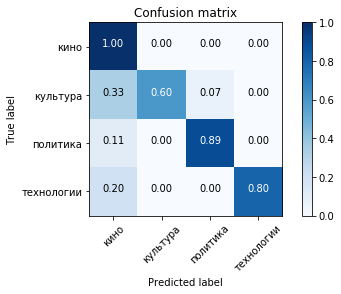

In [21]:
cmt_kNN = confusion_matrix(Y_test, Y_pred_kNN)
plot_confusion_matrix(cmt_kNN, classes=cagories, normalize=True)

In [24]:
P = precision_score(Y_test, Y_pred_kNN, average='macro')
R = recall_score(Y_test, Y_pred_kNN, average='macro')

print 'Precision: {}, Recall: {}'.format(P, R)

Precision: 0.829365079365, Recall: 0.822222222222


# SVM классификация

In [40]:
%%time
from sklearn.svm import SVC
parameters = [
    {'C': range(1, 20), 'kernel': ['linear']},
    {'C': range(1, 20), 'kernel': ['rbf'], 'gamma': [0.5, 0.05, 0.005, 0.0005]},
    {'C': range(1, 20), 'kernel': ['poly'], 'gamma': [0.5, 0.05, 0.005, 0.0005]},
    {'C': range(1, 20), 'kernel': ['sigmoid'], 'gamma': [0.5, 0.05, 0.005, 0.0005]}
    ]
svm = SVC()
svmGS = GridSearchCV(svm, parameters, scoring='f1_macro', n_jobs=-1, cv=sKFold, verbose=10)
svmGS.fit(X_train, Y_train)

print 'Best params:'
print svmGS.best_params_
print 'Best score:'
print svmGS.best_score_

Fitting 5 folds for each of 247 candidates, totalling 1235 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   

Best params:
{u'kernel': u'sigmoid', u'C': 3, u'gamma': 0.5}
Best score:
0.7158274155198003
CPU times: user 4.65 s, sys: 721 ms, total: 5.37 s
Wall time: 2min 19s


In [41]:
bestSVM = svmGS.best_estimator_
Y_pred_SVM = bestSVM.predict(X_test)
print "Test data F1-score: ", f1_score(Y_test, Y_pred_SVM, average='macro')

Test data F1-score:  0.761012379433432


Normalized confusion matrix
[[1.         0.         0.         0.        ]
 [0.46666667 0.46666667 0.06666667 0.        ]
 [0.11111111 0.         0.88888889 0.        ]
 [0.1        0.         0.         0.9       ]]


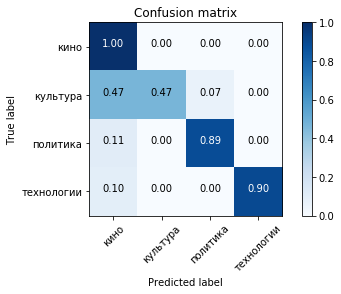

In [42]:
cmt_SVM = confusion_matrix(Y_test, Y_pred_SVM)
plot_confusion_matrix(cmt_SVM, classes=cagories, normalize=True)

In [43]:
P = precision_score(Y_test, Y_pred_SVM, average='macro')
R = recall_score(Y_test, Y_pred_SVM, average='macro')

print 'Precision: {}, Recall: {}'.format(P, R)

Precision: 0.822222222222, Recall: 0.813888888889


# Random Forest классификация

In [56]:
%%time
from sklearn.ensemble import RandomForestClassifier
parameters = {"max_depth" : np.arange(35, 56, 5),
              "n_estimators" : np.arange(100, 1001, 50),
             "min_samples_leaf": [0.001, 0.003, 0.005, 0.007, 0.008, 0.009, 0.01, 0.012, 0.015, 0.02, 0.03, 0.05],
             "max_features": [0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
             }
rfc = RandomForestClassifier(criterion='entropy')
rfcGS = GridSearchCV(rfc, parameters, scoring='f1_macro', n_jobs=-1, cv=sKFold, verbose=10)
rfcGS.fit(X_train, Y_train)

print 'Best params:'
print rfcGS.best_params_
print 'Best score:'
print rfcGS.best_score_

Fitting 5 folds for each of 6840 candidates, totalling 34200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   30.6s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   43.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  4

[Parallel(n_jobs=-1)]: Done 8970 tasks      | elapsed: 301.9min
[Parallel(n_jobs=-1)]: Done 9105 tasks      | elapsed: 305.3min
[Parallel(n_jobs=-1)]: Done 9240 tasks      | elapsed: 309.9min
[Parallel(n_jobs=-1)]: Done 9377 tasks      | elapsed: 315.2min
[Parallel(n_jobs=-1)]: Done 9514 tasks      | elapsed: 320.6min
[Parallel(n_jobs=-1)]: Done 9653 tasks      | elapsed: 325.0min
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed: 330.1min
[Parallel(n_jobs=-1)]: Done 9933 tasks      | elapsed: 334.4min
[Parallel(n_jobs=-1)]: Done 10074 tasks      | elapsed: 339.4min
[Parallel(n_jobs=-1)]: Done 10217 tasks      | elapsed: 343.0min
[Parallel(n_jobs=-1)]: Done 10360 tasks      | elapsed: 348.8min
[Parallel(n_jobs=-1)]: Done 10505 tasks      | elapsed: 354.4min
[Parallel(n_jobs=-1)]: Done 10650 tasks      | elapsed: 361.2min
[Parallel(n_jobs=-1)]: Done 10797 tasks      | elapsed: 366.4min
[Parallel(n_jobs=-1)]: Done 10944 tasks      | elapsed: 372.1min
[Parallel(n_jobs=-1)]: Done 11093

KeyboardInterrupt: 

In [ ]:
bestRFC = rfcGS.best_estimator_
Y_pred_RFC = bestRFC.predict(X_test)
print "Test data F1-score: ", f1_score(Y_test, Y_pred_RFC, average='macro')

In [ ]:
cmt_RFC = confusion_matrix(Y_test, Y_pred_RFC)
plot_confusion_matrix(cmt_RFC, classes=cagories, normalize=True)

In [ ]:
P = precision_score(Y_test, Y_pred_RFC, average='macro')
R = recall_score(Y_test, Y_pred_RFC, average='macro')

print 'Precision: {}, Recall: {}'.format(P, R)